# **Asignatura**: Aprendizaje Automático

**Práctica 2**: Aprendizaje no supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 25 de Abril de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Mirko Speciale</mark>





# **Agrupamiento**

En este ejercicio los alumnos se enfrentarán a un problema de agrupamiento, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que estos puedan agruparse en categorías o *clusters*. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365 (URL: <a href="https://www.jstor.org/stable/2347385?origin=crossref&seq=1">https://www.jstor.org/stable/2347385?origin=crossref&seq=1</a>.

## Contexto y motivación del problema

Un **géiser** es una fuente de agua caliente que, de manera intermitente, expulsa vapor y agua a presión hacia el aire. Esto ocurre cuando el agua subterránea se calienta por el magma o rocas calientes. Cuando la presión se acumula lo suficiente, el agua se libera en forma de erupción. Los géiseres son fenómenos naturales fascinantes y se pueden encontrar en lugares como Yellowstone en Estados Unidos.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg/250px-Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg" />
</center>

En particular, el conocido como *Old Faithful* es uno de los géiseres más famosos del mundo y se encuentra en el Parque Nacional Yellowstone, en Estados Unidos. Su nombre, que significa "Viejo Fiel", se debe a su regularidad en las erupciones, que ocurren aproximadamente cada 90 minutos, aunque el tiempo puede variar un poco.

Las erupciones de Old Faithful pueden alcanzar alturas de entre 30 y 55 metros, y suelen durar entre 1.5 y 5 minutos. Este géiser es conocido por su confiabilidad, lo que lo convierte en una atracción popular para los visitantes del parque. Además de su impresionante actividad, el área que lo rodea está llena de otras características geotérmicas, como fumarolas y piscinas de agua caliente.

Old Faithful ha sido objeto de estudio durante más de un siglo, y su actividad es monitorizada para entender mejor los procesos geotérmicos. Esta monitorización, a nivel básico, contempla dos tipos de medidas:

- El tiempo que transcurre entre dos erupciones consecutivas, medido en minutos.
- La duración de una erupción (en minutos).


## El conjunto de datos

El conjunto de datos que vamos a utilizar contiene 272 muestras de dos valores de monitorización del Geyser *Old Faithful* y, en particular, la duración de cada erupción (en minutos) y el tiempo transcurrido entre dos erupciones consecutivas (medido también en minutos).



El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat</a>.

**NOTA:** Para leer este conjunto de datos desde **Pandas** será necesario omitir las primeras líneas del fichero, dado que se tratan de una descripción del contenido del mismo. Se recomienda mirar el parámetro **skiprows** de **read_fwf** en la documentación (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html">https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html</a>) para leer ficheros de texto con columnas de ancho fijo.


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de identificar, si es posible, cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas. El/los modelo/s de decisión para determinar el número de categorías deberá/n ser un/os método/s de aprendizaje no supervisado para construcción de agrupamientos.

In [ ]:
# Carga del conjunto de datos
import pandas as pd

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(20)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
5,6,2.883,55
6,7,4.700,88
7,8,3.600,85
8,9,1.950,51
9,10,4.350,85


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


**NOTA IMPORTANTE:** La clase que implementa al algoritmo DBSCAN no tiene un método ```predict()```, aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.


Esta decisión se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Pero **sí se puede usar un clasificador para ver en qué cluster está cada punto nuevo**. Hazlo con un **clasificador
kNN** sobre los $k=10$ vecinos más cercanos, utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas.

## *Introducción*

---

---

En este problema analizaré datos sobre el famoso géiser Old Faithful, situado en el Parque Nacional de Yellowstone, en Estados Unidos. Old Faithful es conocido por la regularidad de sus erupciones, que se producen cada 90 minutos aproximadamente y pueden alcanzar alturas de entre 30 y 55 metros, con una duración de entre 1,5 y 5 minutos. Esto la convierte en una de las atracciones más populares del parque.

Mi conjunto de datos contiene 272 muestras, cada una de las cuales incluye dos medidas: la duración de cada erupción y el tiempo transcurrido entre dos erupciones consecutivas.

Por lo tanto, desarrollaré un modelo de aprendizaje automático no supervisado para identificar, si es posible, cuántas categorías de erupciones existen basándome en los datos de las mediciones. Para ello, utilizaré métodos de agrupación para determinar el número de categorías de erupciones en los datos.


---
Preprocesamiento

---

En esta primera parte del proyecto, me ocuparé del preprocesamiento. En concreto, empezaré por examinar las características de los datos que obran en nuestro poder. Veo con el método .describe y .info de pandas que en realidad trabajamos con 272 muestras y que una columna es entera mientras que otra es decimal. Como se indica en la explicación del trabajo asignado, hay una columna de más que será eliminada.


Una vez hecho esto, procedo a una primera visualización de los datos, primero de la característica única, luego unidos


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


,Unnamed: 0,eruptions,waiting
count,272.000000,272.000000,272.000000
mean,29.746324,3.487783,70.897059
std,23.449679,1.141371,13.594974
min,1.000000,1.600000,43.000000
25%,15.000000,2.162750,58.000000
50%,21.000000,4.000000,76.000000
75%,31.250000,4.454250,82.000000
max,99.000000,5.100000,96.000000


In [ ]:
df = df.drop(columns=["Unnamed: 0"])
print(df.columns)


Index(['eruptions', 'waiting'], dtype='object')


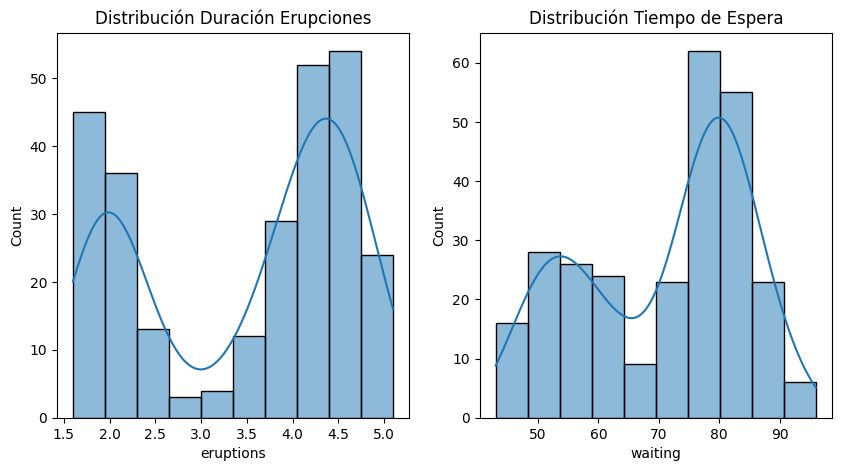

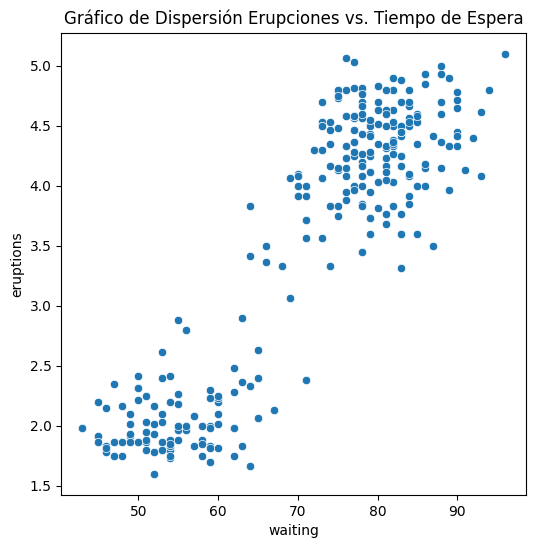

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['eruptions'], kde=True)
plt.title('Distribución Duración Erupciones')

plt.subplot(1, 2, 2)
sns.histplot(df['waiting'], kde=True)
plt.title('Distribución Tiempo de Espera')
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x='waiting', y='eruptions', data=df)
plt.title('Gráfico de Dispersión Erupciones vs. Tiempo de Espera')
plt.show()

Tras un estudio más general, ahora toca entrar en más detalles y manipular los datos.

Empiezo por la normalización y luego empiezo a establecer las características que me van a servir para aplicar el K-Means.

Primero establezco que la distancia que voy a utilizar es la distancia euclídea que es la distancia entre dos puntos y luego inicializo una función llamada “predict” que calcula el centroide más cercano para cada posible característica.

De hecho, cada punto de datos está representado por un vector de características, es decir, una posición en un espacio multidimensional. Aunque los centroides representan los «centros» teóricos de cada cluster, también son vectores en el mismo espacio.

Lo que hará este algoritmo es determinar para cada punto cuál es el centroide más cercano a él, y en nuestro caso lo hará calculando la distancia euclídea. Después de calcular estas distancias para todos los centroides, seleccionamos el centroide con la distancia mínima, osea, el más cercano.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [ ]:
# Distancia a usar como métrica de similitud entre patrones
def euclidean(x, y):
  return np.sqrt( np.sum( (x-y)**2, axis=-1) )


In [ ]:
# Cálculo del centroide más próximo a los patrones X
def predict(X, centroides):

  # Expandimos X para poder hacer cálculos de forma matricial más eficientemente con la característica de NumPy para broadcasting
  X= np.repeat(X, centroides.shape[0], axis=0).reshape(-1, centroides.shape[0], centroides.shape[1])

  # Calculamos las distancias de cada elemento de X a los centroides
  distancias= euclidean(X, centroides)

  # Calculamos el cluster más próximo a cada elemento de X
  clusters= np.argmin(distancias, axis= -1)
  return clusters.reshape(-1)


Con esta parte del código, calculamos la WCSS, que significa Within-Cluster Sum of Squares.

De hecho, se trata de una medida utilizada en el análisis de clusters cuando se utiliza el algoritmo K-means. Sirve para cuantificar la variabilidad de los datos dentro de cada cluster y se realiza calculando la suma de distancias al cuadrado entre cada punto de datos y el centroide del cluster al que pertenece.

El objetivo del algoritmo K-means es minimizar la WCSS, de forma que los puntos de cada clúster estén lo más cerca posible unos de otros, haciendo que los propios clústeres sean más compactos y distintos entre sí. Un WCSS más bajo indica que los clusters son más densos y están mejor definidos.

La forma más habitual de determinar el número óptimo de clusters es el «método del codo», que consiste en trazar el WCSS frente al número de clusters e identificar el punto en el que añadir más clusters no conduce a una reducción significativa del WCSS. Este punto suele aparecer como un «codo» en el gráfico, que será precisamente el valor que vamos a utilizar

In [ ]:
# Cálculo de la métrica Within-Cluster Sum of Squares (WCSS).
def WCSS(X, clusters, centroides):

  wcss= 0
  for i in range(len(centroides)):
    centroid_i= centroides[i, :].squeeze()
    elementos_cluster= X[clusters==i, :].squeeze()

    distancias_sqr= euclidean(elementos_cluster, centroid_i)**2
    wcss+= np.sum(distancias_sqr)
  return wcss

Aquí entramos en la implementación del algoritmo K-means. En primer lugar, se seleccionan aleatoriamente k puntos de los datos como centroides iniciales. A continuación, entra en un bucle iterativo en el que asigna cada punto al cluster más cercano y recalcula los centroides como la media de los puntos asignados a cada cluster.

$$
\mu = \left( \frac{1}{m} \sum_{j=1}^{m} x_{j1}, \frac{1}{m} \sum_{j=1}^{m} x_{j2}, \ldots, \frac{1}{m} \sum_{j=1}^{m} x_{jn} \right)
$$

donde:

$\mu$ es el centroide del clúster,

$\frac{1}{m} \sum_{j=1}^{m} x_{j1}$ indica que estamos calculando la media de los valores desde j=1 hasta j=m, donde m es el número de puntos del cluster y $x_{jn}$ simplemente las coordenadas del punto de datos.



A continuación, verifica la convergencia comparando el desplazamiento de los centroides con la tolerancia establecida, que es de 0,0001 unidades.

In [ ]:
def KMeans(X, k, max_iter=100, tol=1e-4):
    # Inicialización aleatoria de los centroides
    idx = np.random.choice(X.shape[0], k, replace=False)
    centroides = X[idx, :]

    for i in range(max_iter):
        clusters = predict(X, centroides)

        nuevos_centroides = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Comprueba la convergencia
        if np.linalg.norm(centroides - nuevos_centroides) < tol:
            break

        centroides = nuevos_centroides

    return clusters, centroides


En consonancia con lo realizado en el bloque anterior, ahora se prueba el K-means con diferentes valores de k que van de 1 a 10, para cada valor se calcula el WCSS y a continuación se proporciona la visualización.

Un segundo método implementado es el cálculo del coeficiente de Silhouette para cada valor de 2 a 10. Esta métrica proporciona una evaluación adicional de la calidad de la agrupación, sus valores pueden variar entre -1 y 1, donde 1 indica agrupaciones bien definidas, 0 indica agrupaciones solapadas y -1 indica asignaciones probablemente incorrectas.
El coeficiente de silueta se calcula como:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

donde

$a(i)$ es la distancia media entre el punto i y todos los demás puntos de su mismo clúster y, por tanto, nos indica lo cerca que está el punto i de los demás puntos de su clúster. Este valor se denomina cohesión.

$b(i)$ por otra parte, es la distancia media entre el punto i y todos los puntos del conglomerado más cercano (distinto del conglomerado de i). Mide la distancia entre el punto i y los puntos de los demás conglomerados, y se denomina separación.



 También se ofrece aquí una visualización.



A partir de los dos gráficos creados, observamos que el valor WCSS experimenta una reducción drástica en k=2 mientras que para k=3 sigue disminuyendo pero sin cambios drásticos, asimismo, observamos que para k=2 encontramos el coeficiente de Silhouette más elevado, que es de 0,72.

Esto ya nos indica que para nuestro conjunto de datos la mejor división es con dos agrupaciones, que en nuestro problema, significa que sólo hay dos categorías de erupciones.


A continuación se ofrecen otras visualizaciones para valores más altos de K y el valor correspondiente del coeficiente de silueta.

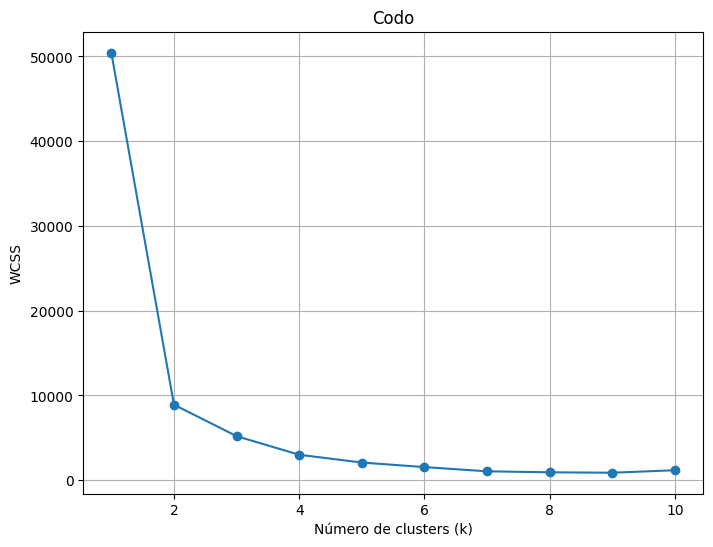

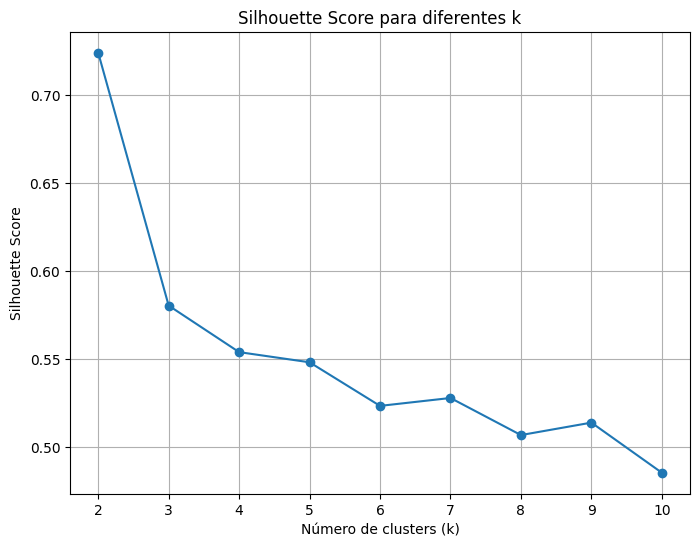

In [ ]:
from sklearn.metrics import silhouette_score

# Preparación de datos para clustering
X = df.values

# Método del codo (Elbow Method)
wcss_values = []
k_values = range(1, 11)
for k in k_values:
    clusters, centroides = KMeans(X, k)
    wcss_values.append(WCSS(X, clusters, centroides))

# Visualización del gráfico del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS")
plt.title("Codo")
plt.grid(True)
plt.show()

# Cálculo y visualización del Silhouette Score
silhouette_scores = []
for k in range(2, 11):  # Comienza desde 2 porque silhouette no está definido para k=1
    clusters, centroides = KMeans(X, k)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

# Visualización del Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para diferentes k")
plt.grid(True)
plt.show()

Silhouette Score para k=2: 0.72


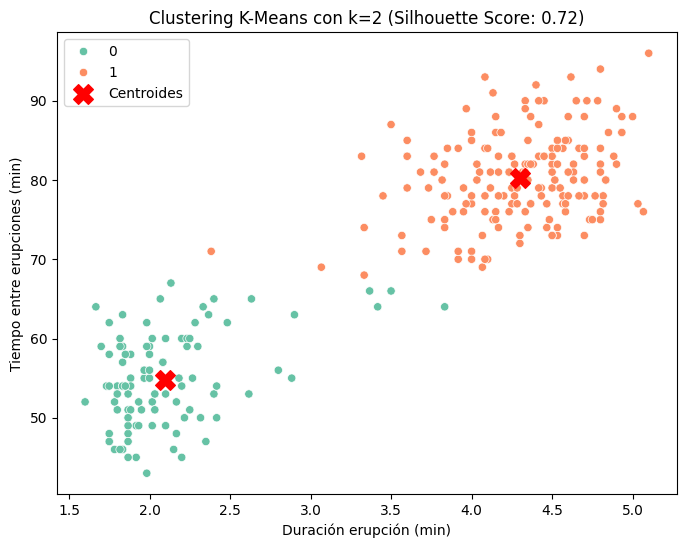

In [ ]:
from sklearn.metrics import silhouette_score

# Probamos con 2 clusters
k = 2
clusters, centroides = KMeans(X, k)

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg:.2f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Duración erupción (min)")
plt.ylabel("Tiempo entre erupciones (min)")
plt.title(f"Clustering K-Means con k={k} (Silhouette Score: {silhouette_avg:.2f})")
plt.legend()
plt.show()

A lo largo de nuestro proceso de trabajo, trabajamos con la totalidad de los datos. En este bloque de código, sin embargo, decidimos adoptar un cambio para comprobar lo bien que se ha realizado nuestro primer clustering y la capacidad de clustering del kmeans sobre nuestros datos.



Para ello decido dividir nuestro conjunto de datos normalizados en un conjunto de entrenamiento que contiene el 80% de los datos y un conjunto de prueba con el 20% restante con la ayuda de train_test_split de sklearn. En este punto ejecuto el algoritmo K-means en el conjunto de entrenamiento con k=2 clusters mientras que la función predict asigna los puntos del conjunto de prueba a los clusters más cercanos basándose en los centroides encontrados en el entrenamiento.



Por último, calculo el coeficiente de silueta que, con un valor de 0,75, me sugiere que el algoritmo generaliza muy bien y que el modelo no tiene sobreajuste en los datos de entrenamiento.



Seguimos con las otras visualizaciones con otros valores de K y los datos completos

In [ ]:
from sklearn.model_selection import train_test_split

# Usamos los datos estandarizados
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Ejecutamos KMeans solo en el conjunto de entrenamiento
k = 2  # el valor óptimo elegido antes
clusters_train, centroides = KMeans(X_train, k)

# Usamos predict para asignar los clusters al conjunto de prueba
clusters_test = predict(X_test, centroides)

# Calculamos el silhouette score en el conjunto de prueba
silhouette_test = silhouette_score(X_test, clusters_test)

print(f"Silhouette Score en el conjunto de prueba (con k={k}): {silhouette_test:.2f}")

Silhouette Score en el conjunto de prueba (con k=2): 0.75


Silhouette Score para k=3: 0.58


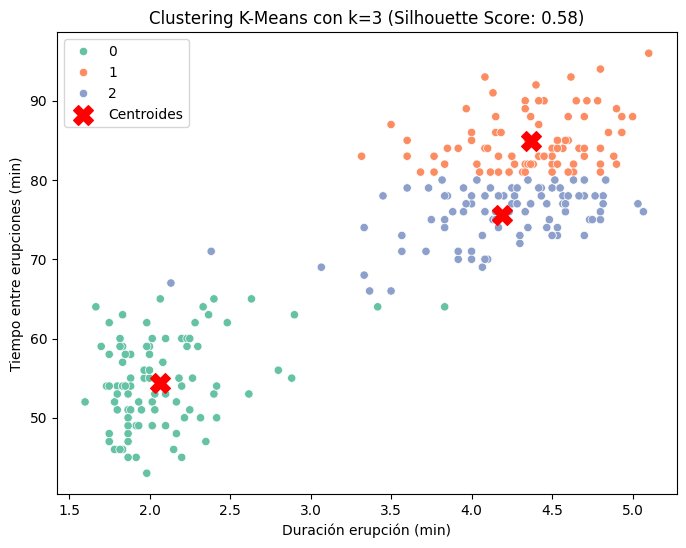

In [ ]:
from sklearn.metrics import silhouette_score

# Probamos con 3 clusters
k = 3
clusters, centroides = KMeans(X, k)

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg:.2f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Duración erupción (min)")
plt.ylabel("Tiempo entre erupciones (min)")
plt.title(f"Clustering K-Means con k={k} (Silhouette Score: {silhouette_avg:.2f})")
plt.legend()
plt.show()

Silhouette Score para k=4: 0.54


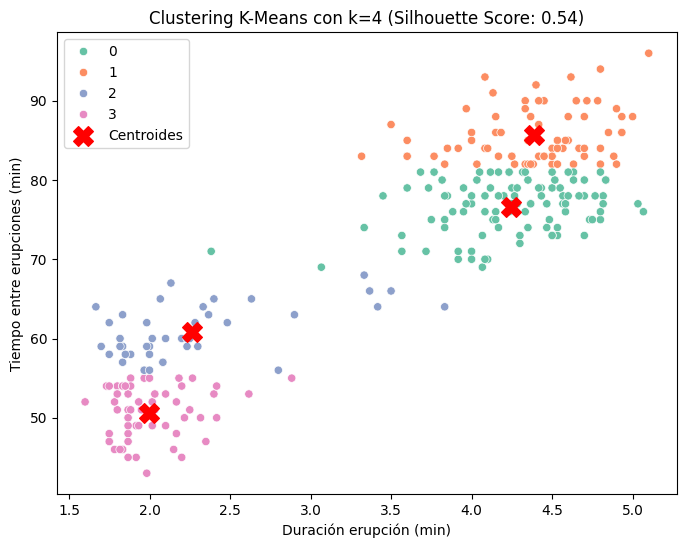

In [ ]:
from sklearn.metrics import silhouette_score

# Probamos con 4 clusters
k = 4
clusters, centroides = KMeans(X, k)

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg:.2f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Duración erupción (min)")
plt.ylabel("Tiempo entre erupciones (min)")
plt.title(f"Clustering K-Means con k={k} (Silhouette Score: {silhouette_avg:.2f})")
plt.legend()
plt.show()

Silhouette Score para k=6: 0.49


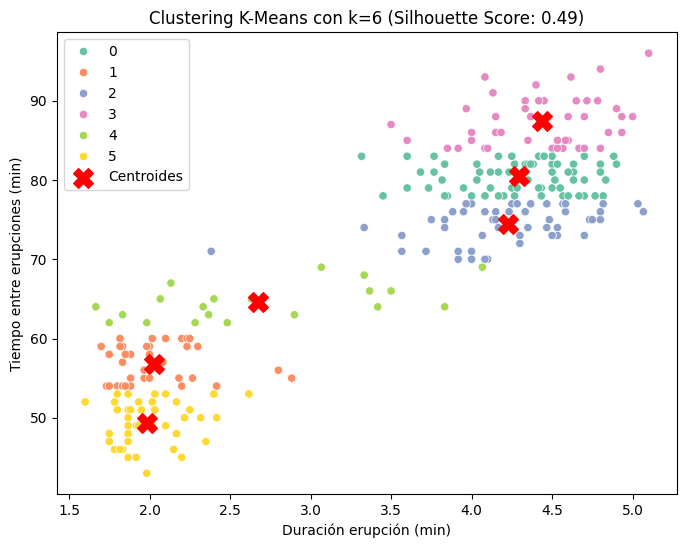

In [ ]:
from sklearn.metrics import silhouette_score

# Probamos con 5 clusters
k = 6
clusters, centroides = KMeans(X, k)

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg:.2f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Duración erupción (min)")
plt.ylabel("Tiempo entre erupciones (min)")
plt.title(f"Clustering K-Means con k={k} (Silhouette Score: {silhouette_avg:.2f})")
plt.legend()
plt.show()

Silhouette Score para k=7: 0.49


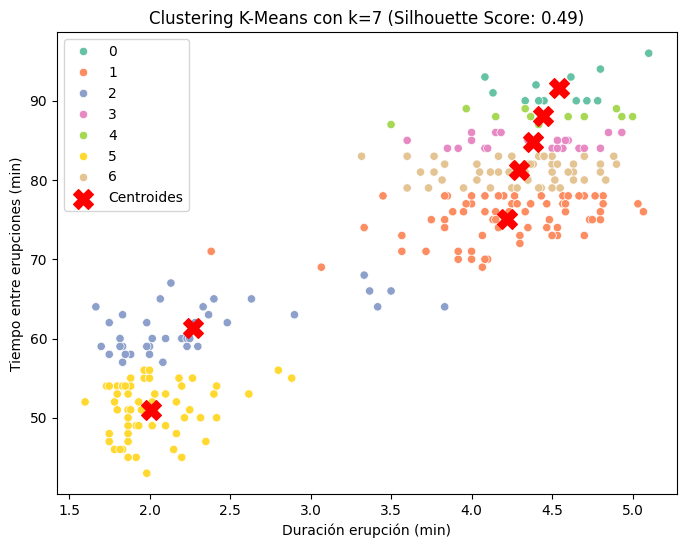

In [ ]:
from sklearn.metrics import silhouette_score

# Probamos con 7 clusters
k = 7
clusters, centroides = KMeans(X, k)

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg:.2f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Duración erupción (min)")
plt.ylabel("Tiempo entre erupciones (min)")
plt.title(f"Clustering K-Means con k={k} (Silhouette Score: {silhouette_avg:.2f})")
plt.legend()
plt.show()

Silhouette Score para k=8: 0.50


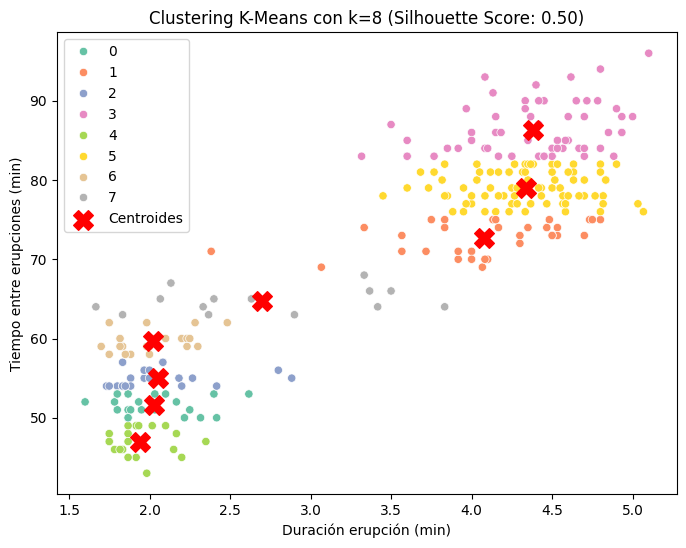

In [ ]:
from sklearn.metrics import silhouette_score

# Probamos con 8 clusters
k = 8
clusters, centroides = KMeans(X, k)

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg:.2f}")

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Duración erupción (min)")
plt.ylabel("Tiempo entre erupciones (min)")
plt.title(f"Clustering K-Means con k={k} (Silhouette Score: {silhouette_avg:.2f})")
plt.legend()
plt.show()

Aquí, utilizando la función make_blobs de scikit-learn, el código genera un conjunto de puntos distribuidos en un espacio bidimensional. Estos puntos no se distribuyen aleatoriamente, sino que se organizan en dos clusters distintos. Cada conglomerado se caracteriza por una distribución gaussiana de puntos en torno a un centro específico, creando así agrupaciones naturales que se asemejan a manchas cuando se visualizan.

En total, se generan 100 puntos, cada uno caracterizado por dos coordenadas (x₁, x₂). Estos puntos se almacenan en la matriz x, mientras que sus pertenencias a clusters se almacenan en el vector y.

Los datos se visualizan mediante la función plot_clusters, que crea un gráfico de dispersión y colorea los puntos en función de su pertenencia a un clúster.


A continuación, se repite el código para varios valores de k, hasta 4, donde se observa un acercamiento de los clusters y una distinción de peor calidad

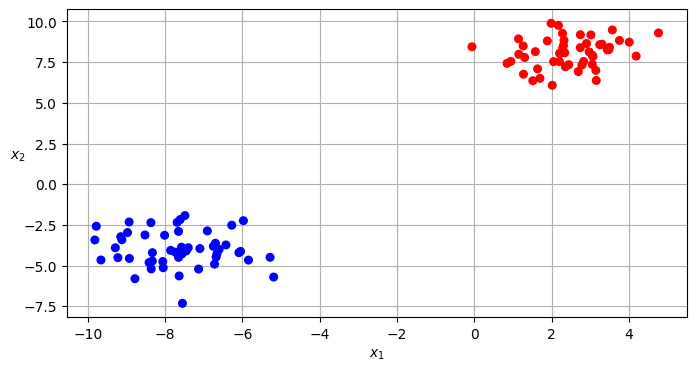

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

clusters_real = 2  # Número de clusters a generar

# Generación de clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=clusters_real)

# Función para mostrar los clusters
def plot_clusters(X, y=None):
    plt.figure(figsize=(8, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')  # Usa 'bwr' para azul y rojo
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.gca().set_axisbelow(True)
    plt.grid()
    plt.show()

# Muestra el dataset
plot_clusters(X, y)

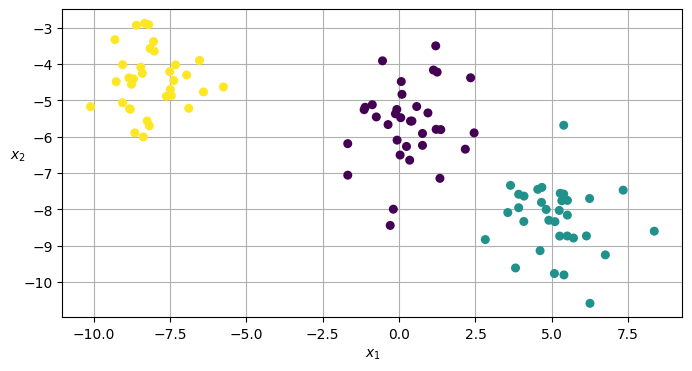

In [ ]:
from sklearn.datasets import make_blobs

clusters_real = 3 # Número de clusters a generar

# Generación de clusters
X, y = make_blobs(n_samples=100, n_features=3, centers=clusters_real)

# Función auxiliar para mostrar los clusters
def plot_clusters(X, y=None):
    plt.figure(figsize=(8, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.gca().set_axisbelow(True)
    plt.grid()
    plt.show()

# Mostrar el dataset
plot_clusters(X, y)

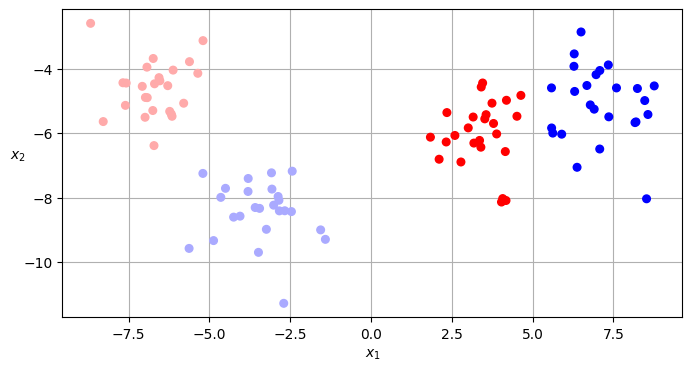

In [ ]:
from sklearn.datasets import make_blobs

clusters_real= 4 # Número de clusters a generar

# Generación de clusters
X, y= make_blobs(n_samples=100, n_features=4, centers= clusters_real)

# Función auxiliar para mostrar los clusters
def plot_clusters(X, y=None):
  plt.figure(figsize=(8, 4))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)
  plt.gca().set_axisbelow(True)
  plt.grid()
  plt.show()

# Mostrar el dataset
plot_clusters(X, y)

DBSCAN

Pasemos ahora al algoritmo DBSCAN, que tiene una visión completamente distinta de lo que constituye un cluster. En lugar de buscar centros y formas esféricas como hacía en K-Means, DBSCAN piensa en los clusters en términos de densidad: un cluster es una región del espacio donde los puntos están densamente agrupados, separados por regiones donde los puntos son más dispersos. Este algoritmo no requiere que se especifique de antemano el número de clusters, pero necesita dos parámetros: eps, que es la distancia máxima para considerar dos puntos como «vecinos», y min_samples, que es el número mínimo de puntos para formar un cluster.



La diferencia fundamental entre K-Means y DBSCAN se hace evidente cuando se trata de conjuntos de datos con características diferentes. K-means sobresale con conglomerados de forma esférica y tamaño similar, pero puede fracasar estrepitosamente cuando los conglomerados tienen formas irregulares o densidades diferentes. DBSCAN, por su parte, puede identificar conglomerados de cualquier forma y encontrar puntos aislados que no pertenezcan a ningún clúster, pero puede tener dificultades cuando los clústers tienen densidades muy diferentes.

La parte inicial sigue siendo idéntica al procedimiento anterior, vuelvo a cargar el conjunto de datos, elimino la columna sobrante y normalizo

In [ ]:
# Carga del conjunto de datos
import pandas as pd

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(20)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
5,6,2.883,55
6,7,4.700,88
7,8,3.600,85
8,9,1.950,51
9,10,4.350,85


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [ ]:
df = df.drop(columns=["Unnamed: 0"])
print(df.columns)

Index(['eruptions', 'waiting'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Aquí llegamos al meollo de la construcción de nuestro algoritmo DBSCAN, para resumir, se realiza una búsqueda en varios parámetros para encontrar la combinación óptima que maximice la puntuación de Silhouette, que como ya hemos mencionado, es una medida de lo bien agrupados que están los puntos de datos.



Cuando inicializo la función establezco una distancia mínima de 0.1 y una distancia máxima de 1 entre los puntos, también establezco el número de pasos para explorar este rango (eps_steps), y una lista de valores 2, 3, 4, 5, 10 para min_samples que representa el número mínimo de puntos necesarios para formar un cluster. De este modo contemplo el mayor número posible de casesteps

A continuación, la función ejecuta un bucle en cada valor de min_muestras suministrado. Para cada valor, imprime un encabezado para indicar que está analizando ese valor min_muestras en particular. Dentro de este bucle, hay otro bucle que itera sobre cada valor eps generado. Para cada combinación de eps y min_muestras, se crea un modelo DBSCAN y los datos se agrupan mediante fit_predict.

Tras obtener las etiquetas de los clusters, la función calcula el número de clusters y el número de valores atípicos (puntos etiquetados como -1). Si el número de cluster es superior a uno, calcula la puntuación de Silhouette para evaluar la calidad de la agrupación. Si esta puntuación es mejor que la mejor encontrada hasta el momento, actualiza best_score y best_params con los nuevos valores.

La función también traza la puntuación de la Silhouette frente a los valores de eps para cada valor de min_muestras, utilizando matplotlib para mostrar los resultados. Finalmente, imprime los mejores parámetros encontrados; de lo contrario, informa de que ninguna combinación produjo conglomerados válidos.

Por último, la función devuelve los mejores parámetros encontrados, que incluyen eps, min_muestras, etiquetas de cluster y la puntuación de Silhouette asociada. Este enfoque permite la exploración sistemática del espacio de parámetros de DBSCAN para optimizar la agrupación de los datos.

In [ ]:
def explora_dbscan(X, eps_range=(0.1, 1), eps_steps=15, min_samples_values=[2, 3, 4, 5, 10]):
    eps_values = np.linspace(eps_range[0], eps_range[1], eps_steps)
    mejor_score = -1
    mejores_params = None

    for min_samples in min_samples_values:
        print(f"\n--- Análisis para min_samples = {min_samples} ---")
        silhouette_scores = []

        for eps in eps_values:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(X)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_outliers = np.sum(labels == -1)

            print(f"eps={eps:.2f}, clusters={n_clusters}, valores_atípicos={n_outliers}", end='')

            if n_clusters > 1:
                sil = silhouette_score(X, labels)
                silhouette_scores.append(sil)
                print(f", silhouette={sil:.4f}")
                if sil > mejor_score:
                    mejor_score = sil
                    mejores_params = {
                        'eps': eps,
                        'min_samples': min_samples,
                        'labels': labels,
                        'silhouette': sil
                    }
            else:
                silhouette_scores.append(-1)
                print(" → clusters insuficientes para silhouette")

        plt.plot(eps_values, silhouette_scores, label=f"min_samples={min_samples}")

    plt.xlabel("eps")
    plt.ylabel("Silhouette Score")
    plt.title("DBSCAN: Silhouette score vs eps")
    plt.legend()
    plt.grid(True)
    plt.show()

    if mejores_params:
        print(f"\n Mejores parámetros encontrados:")
        print(f" - eps = {mejores_params['eps']:.2f}")
        print(f" - min_samples = {mejores_params['min_samples']}")
        print(f" - silhouette score = {mejores_params['silhouette']:.4f}")
    else:
        print("\n Ninguna combinación produjo clusters válidos.")

    return mejores_params

Es la continuación del bloque anterior y es el más ejecutivo y final. La primera línea de código llama a la función explora_dbscan pasando los datos normalizados como entrada. Esta función devuelve un diccionario que contiene los mejores parámetros encontrados para la agrupación DBSCAN, que se almacenan en la variable mejores_params.

Tras obtener los mejores parámetros, el código extrae los valores de eps, min_muestras y etiquetas de cluster del diccionario mejores_params y los utiliza para calcular el número de clusters y el número de valores atípicos.
 El número de conglomerados se determina contando el número de etiquetas únicas, excluyendo la etiqueta -1 que representa los valores atípicos, mientras que el número de valores atípicos se calcula sumando el número de apariciones de la etiqueta -1.

A continuación, el código calcula la puntuación Calinski-Harabasz, que indica la densidad y separación de los conglomerados, con valores más altos que indican conglomerados más distintos y compactos. A continuación, calcula la puntuación Davies-Bouldin, que evalúa la calidad de la agrupación basándose en la distancia media entre los conglomerados; los valores más bajos indican una mejor separación entre los conglomerados.

Por último, el código imprime un resumen de las métricas de agrupación utilizando los parámetros óptimos.

Nuestros resultados muestran un excelente trabajo realizado por el DBSCAN, de hecho, eps = 0,42 indica un radio de búsqueda bien calibrado que permite identificar correctamente los clusters densos. También observamos que no se encontraron valores atípicos y de nuevo se identifican dos clusters en el mejor de los casos.

En cuanto a las métricas, una puntuación de 0,7460 para el coeficiente Silhouette es bastante buena y indica que los cúmulos están bien separados y que los puntos están cerca del centro de su cúmulo. en el Calinski-Harabasz encontramos un valor de 1574,55 que sugiere que los cúmulos son compactos y están bien separados. En la prueba de Davies-Bouldin, en la que buscamos un valor lo más bajo posible, tenemos un valor de 0,34, que es bueno, ya que indica que los cúmulos están bien separados y se solapan poco.


--- Análisis para min_samples = 2 ---
eps=0.10, clusters=26, valores_atípicos=44, silhouette=-0.0498
eps=0.16, clusters=8, valores_atípicos=14, silhouette=0.0481
eps=0.23, clusters=5, valores_atípicos=6, silhouette=0.3679
eps=0.29, clusters=3, valores_atípicos=3, silhouette=0.5007
eps=0.36, clusters=2, valores_atípicos=1, silhouette=0.5480
eps=0.42, clusters=2, valores_atípicos=0, silhouette=0.7460
eps=0.49, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.55, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.61, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.68, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.74, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.81, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.87, clusters=1, valores_atípicos=0 → clusters insuficientes para silhouette
eps=0.94, clusters=1, v

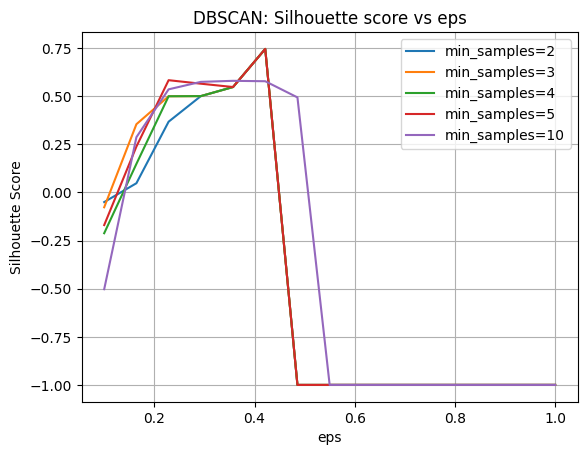


 Mejores parámetros encontrados:
 - eps = 0.42
 - min_samples = 2
 - silhouette score = 0.7460

 Métricas clustering final con parámetros óptimos:
 - Número de clusters: 2
 - Número de valores atípicos: 0
 - Silhouette Score: 0.7460
 - Calinski-Harabasz Score: 1574.55
 - Davies-Bouldin Score: 0.34


In [ ]:
# Ejecución de la búsqueda sobre datos normalizados
mejor_resultado = explora_dbscan(X_scaled)

eps = mejor_resultado['eps']
min_samples = mejor_resultado['min_samples']
labels = mejor_resultado['labels']
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = np.sum(labels == -1)

# Métricas avanzadas
ch_score = calinski_harabasz_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print(f"\n Métricas clustering final con parámetros óptimos:")
print(f" - Número de clusters: {n_clusters}")
print(f" - Número de valores atípicos: {n_outliers}")
print(f" - Silhouette Score: {mejor_resultado['silhouette']:.4f}")
print(f" - Calinski-Harabasz Score: {ch_score:.2f}")
print(f" - Davies-Bouldin Score: {db_score:.2f}")

En este bloque de código, nos salimos un poco de la línea de trabajo habitual, ya que queremos probar la generalización de una agrupación DBSCAN en nuevos datos, utilizando KNN como “clasificador de clusters”, ya que DBSCAN no puede clasificar nuevos puntos. Se trata simplemente de un análisis más robusto de la validez real de los clusters encontrados, utilizando la Silhouette Score.



Enconcreto, ejecutamos DBSCAN en el conjunto de entrenamiento para encontrar los clusters y etiquetamos los posibles valores atípicos con -1 para después eliminarlos.

A continuación, utilizamos KNN para simular DBSCAN en los datos válidos, aprendiendo a asociar nuevos puntos en el conjunto de prueba con los clusters DBSCAN originales y, por último, KNN asigna a cada punto del conjunto de prueba un cluster para después evaluar la cohesión/separación entre clusters utilizando la Silhouette Score.

El valor resultante de 0,7474 es bueno y me sugiere que los clusters asignados por KNN a los puntos del conjunto de prueba están bien separados y que los puntos están cerca de otros en su propio cluster y lejos unos de otros.



Por lo tanto, en general, los clusters encontrados por DBSCAN en el conjunto de entrenamiento también se generalizan bien a los nuevos datos mediante KNN.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# División del conjunto de datos
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Clustering DBSCAN en el conjunto de entrenamiento
db_train = DBSCAN(eps=eps, min_samples=min_samples)
labels_train = db_train.fit_predict(X_train)

# Seleccionamos solo los puntos que NO son valores atípicos
mask_validos = labels_train != -1
X_train_validos = X_train[mask_validos]
y_train_validos = labels_train[mask_validos]

# Entrenamos el KNN en los puntos con clusters válidos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_validos, y_train_validos)

# Usamos KNN para asignar clusters a los datos de prueba
labels_test = knn.predict(X_test)

# Calculamos el Silhouette Score en el conjunto de prueba
sil_test = silhouette_score(X_test, labels_test)
print(f"Silhouette Score en el conjunto de prueba (DBSCAN + KNN): {sil_test:.4f}")

Silhouette Score sul set di test (DBSCAN + KNN): 0.7474


Aquí ofrecemos una visualización del mejor caso y su correspondiente coeficiente de silueta.

En el primer gráfico, observamos cómo nuestros puntos de datos se han separado según la densidad

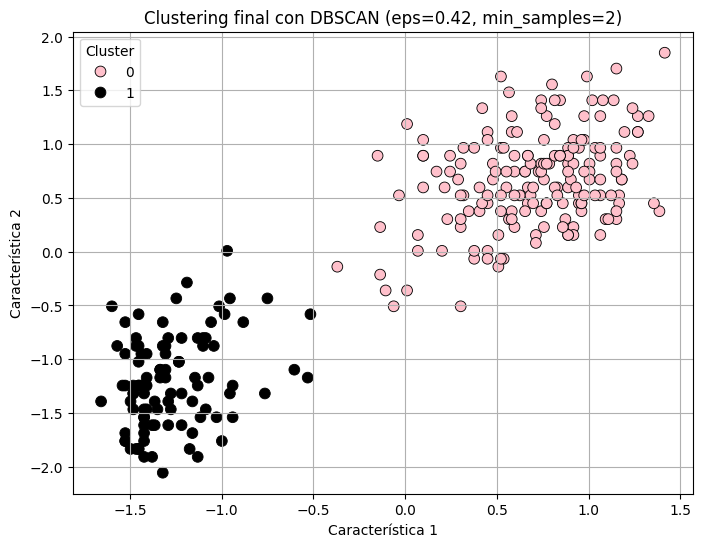

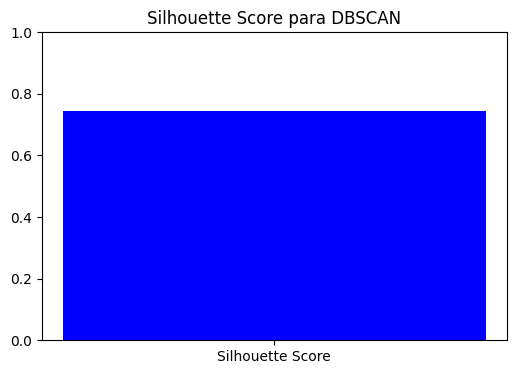

In [ ]:
custom_palette = {0: 'pink', 1: 'black'}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=mejor_resultado['labels'],
    palette=custom_palette,  # Usa la paleta personalizada
    s=60,
    edgecolor='k'
)
plt.title(f"Clustering final con DBSCAN (eps={mejor_resultado['eps']:.2f}, min_samples={mejor_resultado['min_samples']})")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.legend(title="Cluster", loc="best")
plt.show()


# Visualización del silhouette score
plt.figure(figsize=(6, 4))
plt.bar(["Silhouette Score"], mejor_resultado['silhouette'], color='blue')
plt.ylim(0, 1)
plt.title("Silhouette Score para DBSCAN")
plt.show()